In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [63]:
# Assuming you have downloaded the dataset and placed it in the current working directory
data = pd.read_csv('/content/online_shoppers_intention.csv')


In [64]:
# Display the first few rows of the dataset
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [65]:
# Check the dimensions of the dataset
data.shape

(12330, 18)

In [66]:
# Get an overview of the dataset, including data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [67]:
# Summary statistics of numerical columns
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [68]:
# Count the number of unique values in each column
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [69]:

# Count the number of missing values in each column
data.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

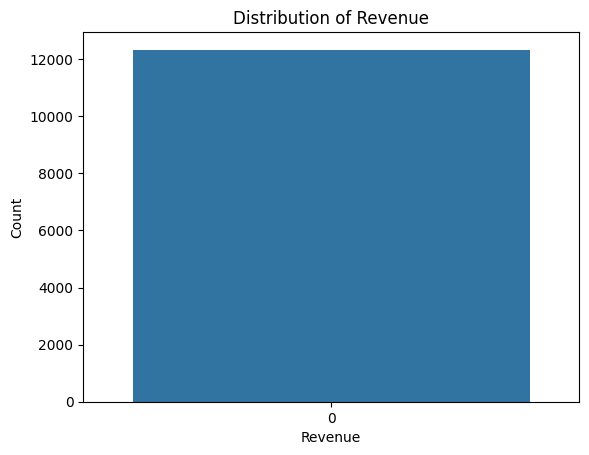

In [70]:
# Visualize the distribution of the target variable
sns.countplot(data['Revenue'])
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Distribution of Revenue')
plt.show()

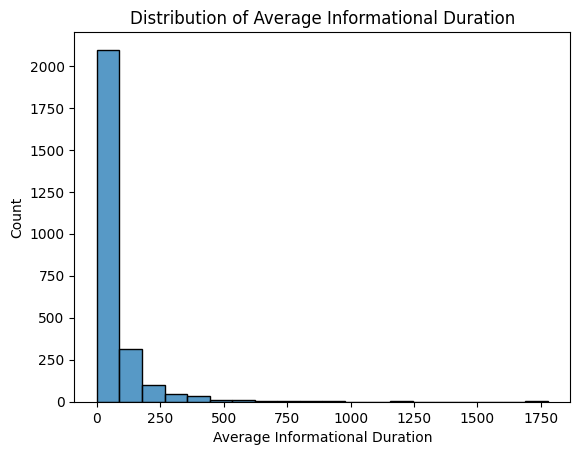

In [71]:
# Calculate the average duration of informational pages visited
data['Informational_Duration'] = data['Informational_Duration'] / data['Informational']

# Plot the distribution of the average informational duration
sns.histplot(data['Informational_Duration'].dropna(), bins=20)
plt.xlabel('Average Informational Duration')
plt.ylabel('Count')
plt.title('Distribution of Average Informational Duration')
plt.show()


In [72]:
# Assuming you have already split the dataset into features (X) and target (y) variables
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




In [73]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<ipython-input-74-13fe3ba155d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='viridis')


<Axes: >

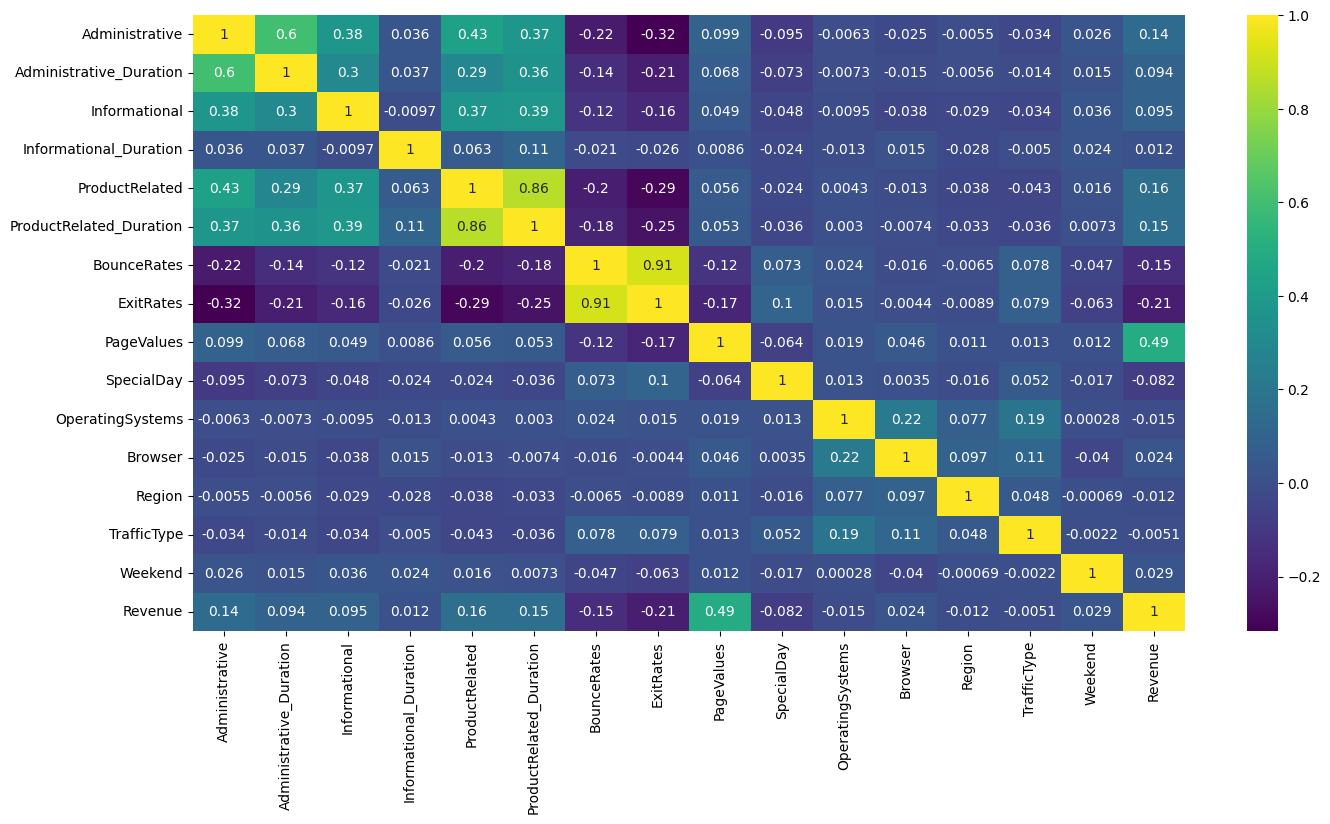

In [74]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [75]:
data[['Browser','TrafficType','OperatingSystems','Region']] = data[['Browser','TrafficType','OperatingSystems','Region']].astype(str)

<Axes: xlabel='Weekend', ylabel='count'>

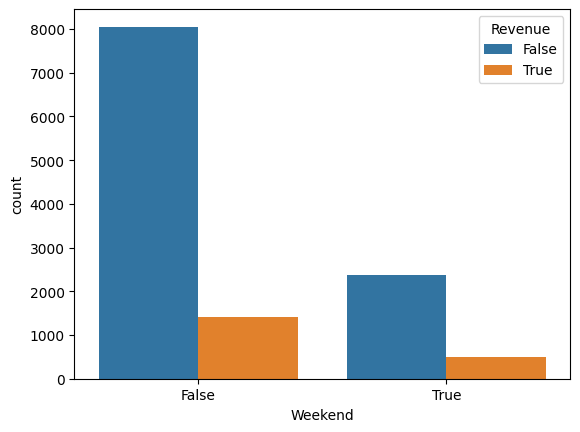

In [76]:
sns.countplot(data=data,x='Weekend',hue='Revenue')

<Axes: xlabel='Revenue', ylabel='count'>

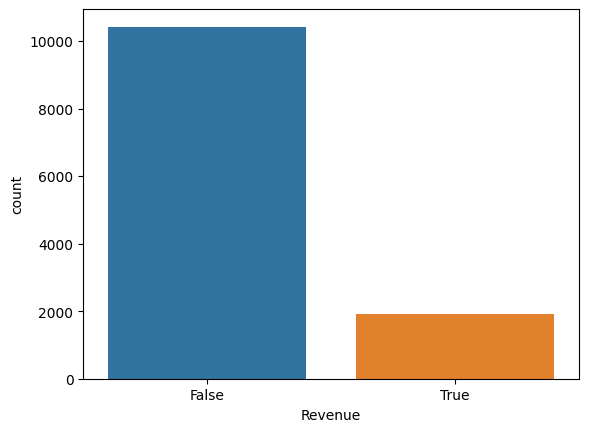

In [77]:
sns.countplot(data=data,x='Revenue')

<Axes: xlabel='Month', ylabel='count'>

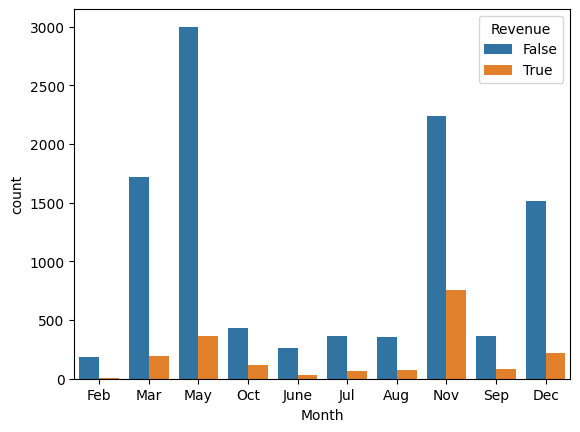

In [78]:
sns.countplot(data=data,x='Month',hue='Revenue')

<Axes: xlabel='Month', ylabel='Revenue'>

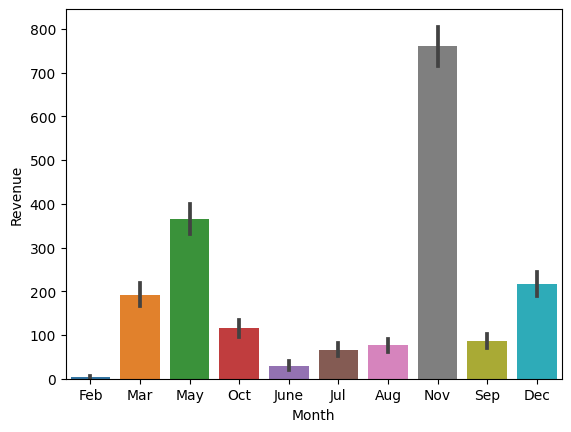

In [79]:
sns.barplot(data=data,x='Month',y='Revenue',estimator=np.sum)

In [80]:
shopping_data  = pd.get_dummies(data,drop_first=True)


In [81]:
shopping_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,NaN,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,NaN,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,NaN,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0,0.0,0,NaN,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
4,0,0.0,0,NaN,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,NaN,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,NaN,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,1
12327,0,0.0,0,NaN,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12328,4,75.0,0,NaN,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
shopping_data['Weekend'] = shopping_data['Weekend'].map({False:0, True:1})
shopping_data['Revenue'] = shopping_data['Revenue'].map({False:0, True:1})

In [83]:
shopping_data[['Weekend','Revenue']]

,Weekend,Revenue
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
12325,1,0
12326,1,0
12327,1,0
12328,0,0


In [84]:
shopping_data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [85]:
shopping_data.dropna(inplace=True)  # Drop rows with missing values from the dataset


In [86]:
X = shopping_data.drop('Revenue',axis=1)

In [87]:
y = shopping_data['Revenue']

In [88]:
from sklearn.model_selection import train_test_split


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler


In [91]:
scaler = StandardScaler()

Modelling

In [92]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Using Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
 
# create regressor object
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
 


In [128]:
# fit the regressor with x and y data
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [139]:
predRF= classifier.predict(X_test)


In [140]:
confusion_matrix(y_test, predRF)

array([[595,  26],
       [104,  65]])

In [ ]:
print(classification_report(y_test, predRF))

In [130]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(classifier, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))


Mean MAE: 0.165 (0.040)


In [131]:
print("Training Accuracy: ", classifier.score(X_train, y_train))
print("Testing Accuracy: ", classifier.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.8354430379746836


classification report for random forest

In [149]:
print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       621
           1       0.68      0.51      0.58       169

    accuracy                           0.84       790
   macro avg       0.78      0.72      0.74       790
weighted avg       0.83      0.84      0.83       790



**Using Gradient Boosting**

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()

In [134]:
gbr.fit(X_train, y_train)

GradientBoostingClassifier()

In [135]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(gbr, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 0.170 (0.038)


In [136]:
print("Training Accuracy: ", gbr.score(X_train, y_train))
print("Testing Accuracy: ", gbr.score(X_test, y_test))

Training Accuracy:  0.8815860945138512
Testing Accuracy:  0.8430379746835444


In [145]:
predgb= gbr.predict(X_test)

classification report for gradient boosting



In [146]:
print(classification_report(y_test, predgb))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       621
           1       0.68      0.51      0.58       169

    accuracy                           0.84       790
   macro avg       0.78      0.72      0.74       790
weighted avg       0.83      0.84      0.83       790

